<a href="https://colab.research.google.com/github/SamuelBFG/DL-studies/blob/master/IA353/EFp3_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Baseline

In [1]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from keras.optimizers import Adam

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
model = tf.keras.models.Sequential([
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(512, activation=tf.nn.relu),
 tf.keras.layers.Dropout(0.5),
 tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])

In [4]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4335 - accuracy: 0.8684
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1426 - accuracy: 0.9570
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1106 - accuracy: 0.9666
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0877 - accuracy: 0.9723
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0787 - accuracy: 0.9754


## Test Accuracy

In [5]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0643 - accuracy: 0.9797


[0.06432517617940903, 0.9797000288963318]

## Working with multiple executions to stabilize results

In [6]:
executions = 5
histories = []
evaluations = []

for i in range(executions):
  model = tf.keras.models.Sequential([
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                      tf.keras.layers.Dropout(0.5),
                                      tf.keras.layers.Dense(10, activation=tf.nn.softmax)
                                      ])
  
  print('## Training model number: ', i+1)

  model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
  
  histories.append(model.fit(x_train, y_train, epochs=5, verbose=0))

  print('#• Test set:')
  evaluations.append(model.evaluate(x_test, y_test))
  print('\n')

## Training model number:  1
#• Test set:
313/313 [==============================] - 1s 1ms/step - loss: 0.0682 - accuracy: 0.9784


## Training model number:  2
#• Test set:
313/313 [==============================] - 1s 1ms/step - loss: 0.0709 - accuracy: 0.9786


## Training model number:  3
#• Test set:
313/313 [==============================] - 1s 1ms/step - loss: 0.0613 - accuracy: 0.9825


## Training model number:  4
#• Test set:
313/313 [==============================] - 1s 1ms/step - loss: 0.0638 - accuracy: 0.9808


## Training model number:  5
#• Test set:
313/313 [==============================] - 1s 1ms/step - loss: 0.0658 - accuracy: 0.9799




In [7]:
histories[0].history.keys()

dict_keys(['loss', 'accuracy'])

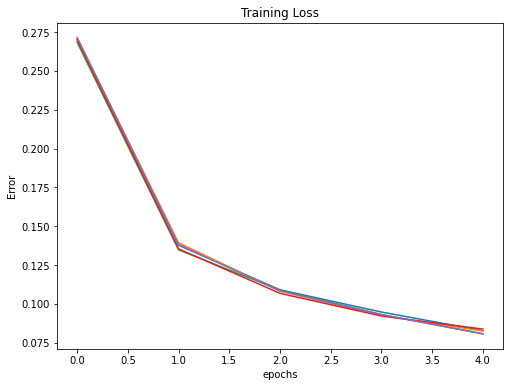

In [8]:
plt.figure(figsize=(8, 6))  
plt.xlabel('epochs')
plt.ylabel('Error')
plt.title('Training Loss')
for i in range(executions):
  plt.plot(histories[i].history['loss'])
plt.show()

In [9]:
histories[-1].history['accuracy'] # Last training acc log per epochs

[0.9184166789054871,
 0.958133339881897,
 0.9668333530426025,
 0.9705333113670349,
 0.9751166701316833]

In [10]:
evaluations[0] # Loss and acc for the first model (LIST)

[0.06819215416908264, 0.9783999919891357]

In [11]:
acc_val = []
acc_test = []

for i in range(executions):
  acc_val.append(sum(histories[i].history['accuracy']) / len(histories[i].history['accuracy']))
  acc_test.append(evaluations[i][1])

acc_val

[0.9578199982643127,
 0.9575566649436951,
 0.9579233288764953,
 0.9577200055122376,
 0.957806670665741]

In [12]:
acc_test

[0.9783999919891357,
 0.978600025177002,
 0.9825000166893005,
 0.9807999730110168,
 0.9799000024795532]

### Average validation accuracy (training set)

In [13]:
avg_acc_val = sum(acc_val)/len(acc_val)
avg_acc_val

0.9577653336524964

### Average test accuracy

In [14]:
avg_acc_test = sum(acc_test)/len(acc_test)
avg_acc_test

0.9800400018692017

## Kfold Cross-Validation

In [15]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [16]:
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import train_test_split

# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []
num_folds = 10


train_data, train_data_val, train_labels, train_labels_val = train_test_split(x_train, y_train, test_size = 0.2)
inputs = np.concatenate((train_data, train_data_val), axis=0)
targets = np.concatenate((train_labels, train_labels_val), axis=0)

kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1

for train, test in kfold.split(inputs, targets):
  model = tf.keras.models.Sequential([
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                      tf.keras.layers.Dropout(0.5),
                                      tf.keras.layers.Dense(10, activation=tf.nn.softmax)
                                      ])
  
  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  
  history = model.fit(inputs[train], targets[train],
              batch_size=64,
              epochs=5,
              verbose=0)

  # Generate generalization metrics
  scores = model.evaluate(x_test, y_test, verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  fold_no = fold_no + 1


# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

Score for fold 1: loss of 0.07056238502264023; accuracy of 97.78000116348267%
Score for fold 2: loss of 0.06608690321445465; accuracy of 97.9099988937378%
Score for fold 3: loss of 0.07162344455718994; accuracy of 97.68999814987183%
Score for fold 4: loss of 0.07014460116624832; accuracy of 97.85000085830688%
Score for fold 5: loss of 0.06928664445877075; accuracy of 97.82000184059143%
Score for fold 6: loss of 0.06553146988153458; accuracy of 97.94999957084656%
Score for fold 7: loss of 0.06464860588312149; accuracy of 98.00000190734863%
Score for fold 8: loss of 0.06958143413066864; accuracy of 97.8600025177002%
Score for fold 9: loss of 0.07374051213264465; accuracy of 97.64000177383423%
Score for fold 10: loss of 0.07335947453975677; accuracy of 97.85000085830688%
------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 0.07056238502264023 - Accuracy: 97.78000116

# Modified Model

#### Add a layer

In [17]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [18]:
train_data, train_data_val, train_labels, train_labels_val = train_test_split(x_train, y_train, test_size = 0.2)

model = tf.keras.models.Sequential([
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(512, activation=tf.nn.relu),
 tf.keras.layers.Dropout(0.5),
 tf.keras.layers.Dense(512, activation=tf.nn.relu),
 tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer = Adam(lr=0.001),
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])

history = model.fit(train_data, train_labels, epochs=8, batch_size=64, validation_data = (train_data_val, train_labels_val), verbose = 2)

Epoch 1/8
750/750 - 2s - loss: 0.2958 - accuracy: 0.9095 - val_loss: 0.1338 - val_accuracy: 0.9579
Epoch 2/8
750/750 - 1s - loss: 0.1511 - accuracy: 0.9525 - val_loss: 0.1063 - val_accuracy: 0.9666
Epoch 3/8
750/750 - 1s - loss: 0.1189 - accuracy: 0.9629 - val_loss: 0.0826 - val_accuracy: 0.9744
Epoch 4/8
750/750 - 1s - loss: 0.1006 - accuracy: 0.9683 - val_loss: 0.0811 - val_accuracy: 0.9753
Epoch 5/8
750/750 - 1s - loss: 0.0890 - accuracy: 0.9715 - val_loss: 0.0762 - val_accuracy: 0.9791
Epoch 6/8
750/750 - 1s - loss: 0.0797 - accuracy: 0.9751 - val_loss: 0.0807 - val_accuracy: 0.9777
Epoch 7/8
750/750 - 1s - loss: 0.0734 - accuracy: 0.9765 - val_loss: 0.0742 - val_accuracy: 0.9793
Epoch 8/8
750/750 - 1s - loss: 0.0662 - accuracy: 0.9787 - val_loss: 0.0725 - val_accuracy: 0.9792


In [19]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.0711 - accuracy: 0.9789


[0.07112521678209305, 0.9789000153541565]

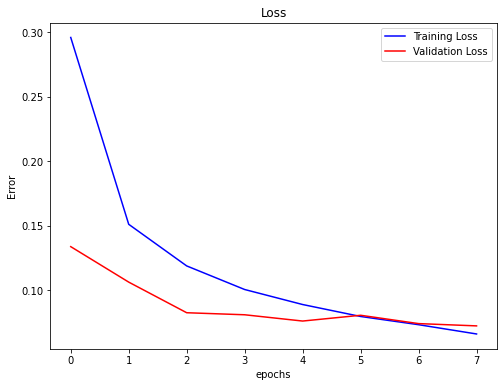

In [20]:
plt.figure(figsize=(8, 6))  
plt.plot(history.history['loss'], color='b')
plt.plot(history.history['val_loss'], color='r')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('Error')
plt.legend(('Training Loss', 'Validation Loss'))
plt.show()

#### Only one layer

In [21]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [22]:
train_data, train_data_val, train_labels, train_labels_val = train_test_split(x_train, y_train, test_size = 0.2)

model = tf.keras.models.Sequential([
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(1024, activation=tf.nn.relu),
 tf.keras.layers.Dropout(0.5),
 tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer = Adam(lr=0.001),
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])

history = model.fit(train_data, train_labels, epochs=8, batch_size=64, validation_data = (train_data_val, train_labels_val), verbose = 2)

Epoch 1/8
750/750 - 2s - loss: 0.2795 - accuracy: 0.9174 - val_loss: 0.1410 - val_accuracy: 0.9582
Epoch 2/8
750/750 - 1s - loss: 0.1336 - accuracy: 0.9596 - val_loss: 0.1090 - val_accuracy: 0.9668
Epoch 3/8
750/750 - 1s - loss: 0.0998 - accuracy: 0.9689 - val_loss: 0.0922 - val_accuracy: 0.9738
Epoch 4/8
750/750 - 1s - loss: 0.0816 - accuracy: 0.9741 - val_loss: 0.0850 - val_accuracy: 0.9746
Epoch 5/8
750/750 - 1s - loss: 0.0680 - accuracy: 0.9774 - val_loss: 0.0817 - val_accuracy: 0.9763
Epoch 6/8
750/750 - 1s - loss: 0.0611 - accuracy: 0.9808 - val_loss: 0.0829 - val_accuracy: 0.9767
Epoch 7/8
750/750 - 1s - loss: 0.0526 - accuracy: 0.9831 - val_loss: 0.0778 - val_accuracy: 0.9788
Epoch 8/8
750/750 - 1s - loss: 0.0481 - accuracy: 0.9843 - val_loss: 0.0761 - val_accuracy: 0.9796


In [23]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.0685 - accuracy: 0.9794


[0.06846427172422409, 0.9793999791145325]

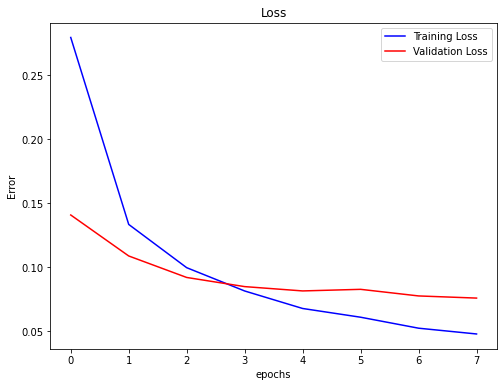

In [24]:
plt.figure(figsize=(8, 6))  
plt.plot(history.history['loss'], color='b')
plt.plot(history.history['val_loss'], color='r')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('Error')
plt.legend(('Training Loss', 'Validation Loss'))
plt.show()

In [25]:
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import train_test_split

# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []
num_folds = 10


train_data, train_data_val, train_labels, train_labels_val = train_test_split(x_train, y_train, test_size = 0.2)
inputs = np.concatenate((train_data, train_data_val), axis=0)
targets = np.concatenate((train_labels, train_labels_val), axis=0)

kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1

for train, test in kfold.split(inputs, targets):
  model = tf.keras.models.Sequential([
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                      tf.keras.layers.Dropout(0.5),
                                      tf.keras.layers.Dense(10, activation=tf.nn.softmax)
                                      ])
  
  model.compile(optimizer = Adam(lr=0.001),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  
  history = model.fit(inputs[train], targets[train],
              batch_size=64,
              epochs=8,
              verbose=0)

  # Generate generalization metrics
  scores = model.evaluate(x_test, y_test, verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  fold_no = fold_no + 1


# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

Score for fold 1: loss of 0.06080665439367294; accuracy of 98.18999767303467%
Score for fold 2: loss of 0.06614413857460022; accuracy of 97.96000123023987%
Score for fold 3: loss of 0.06456096470355988; accuracy of 98.24000000953674%
Score for fold 4: loss of 0.06441190093755722; accuracy of 98.089998960495%
Score for fold 5: loss of 0.05997316911816597; accuracy of 98.12999963760376%
Score for fold 6: loss of 0.06512270867824554; accuracy of 97.99000024795532%
Score for fold 7: loss of 0.05687772110104561; accuracy of 98.2699990272522%
Score for fold 8: loss of 0.06154685094952583; accuracy of 98.2699990272522%
Score for fold 9: loss of 0.06333107501268387; accuracy of 98.0400025844574%
Score for fold 10: loss of 0.059123694896698; accuracy of 98.18999767303467%
------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 0.06080665439367294 - Accuracy: 98.1899976730346

#### Two hidden layers

In [26]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(512, activation=tf.nn.relu),
 tf.keras.layers.Dropout(0.5),
 tf.keras.layers.Dense(512, activation=tf.nn.relu),
 tf.keras.layers.Dropout(0.5),
 tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer = Adam(lr=0.001),
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])

history = model.fit(train_data, train_labels, epochs=10, batch_size=64, validation_data = (train_data_val, train_labels_val), verbose = 2)

model.evaluate(x_test, y_test)

Epoch 1/10
750/750 - 2s - loss: 0.3447 - accuracy: 0.8931 - val_loss: 0.1541 - val_accuracy: 0.9528
Epoch 2/10
750/750 - 1s - loss: 0.1738 - accuracy: 0.9483 - val_loss: 0.1108 - val_accuracy: 0.9650
Epoch 3/10
750/750 - 1s - loss: 0.1402 - accuracy: 0.9565 - val_loss: 0.1055 - val_accuracy: 0.9674
Epoch 4/10
750/750 - 1s - loss: 0.1199 - accuracy: 0.9625 - val_loss: 0.0829 - val_accuracy: 0.9749
Epoch 5/10
750/750 - 1s - loss: 0.1032 - accuracy: 0.9686 - val_loss: 0.0880 - val_accuracy: 0.9733
Epoch 6/10
750/750 - 1s - loss: 0.1008 - accuracy: 0.9693 - val_loss: 0.0803 - val_accuracy: 0.9759
Epoch 7/10
750/750 - 1s - loss: 0.0891 - accuracy: 0.9722 - val_loss: 0.0894 - val_accuracy: 0.9752
Epoch 8/10
750/750 - 1s - loss: 0.0843 - accuracy: 0.9731 - val_loss: 0.0765 - val_accuracy: 0.9785
Epoch 9/10
750/750 - 1s - loss: 0.0833 - accuracy: 0.9739 - val_loss: 0.0745 - val_accuracy: 0.9783
Epoch 10/10
750/750 - 1s - loss: 0.0768 - accuracy: 0.9759 - val_loss: 0.0718 - val_accuracy: 0.9785

[0.06580030173063278, 0.9817000031471252]

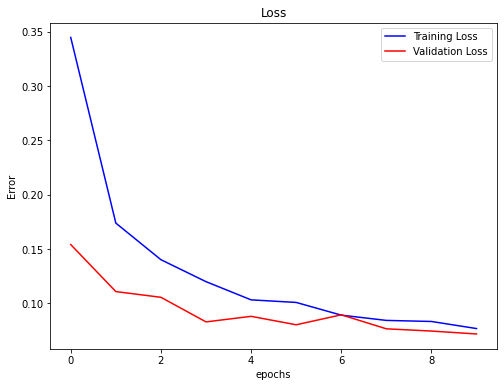

In [27]:
plt.figure(figsize=(8, 6))  
plt.plot(history.history['loss'], color='b')
plt.plot(history.history['val_loss'], color='r')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('Error')
plt.legend(('Training Loss', 'Validation Loss'))
plt.show()

In [28]:
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import train_test_split

# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []
num_folds = 10


train_data, train_data_val, train_labels, train_labels_val = train_test_split(x_train, y_train, test_size = 0.2)
inputs = np.concatenate((train_data, train_data_val), axis=0)
targets = np.concatenate((train_labels, train_labels_val), axis=0)

kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1

for train, test in kfold.split(inputs, targets):
  model = tf.keras.models.Sequential([
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                      tf.keras.layers.Dropout(0.5),
                                      tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                      tf.keras.layers.Dense(10, activation=tf.nn.softmax)
                                      ])
  
  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  
  history = model.fit(inputs[train], targets[train],
              batch_size=64,
              epochs=10,
              verbose=0)

  # Generate generalization metrics
  scores = model.evaluate(x_test, y_test, verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  fold_no = fold_no + 1


# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

Score for fold 1: loss of 0.06412605941295624; accuracy of 98.25999736785889%
Score for fold 2: loss of 0.06436967849731445; accuracy of 98.25000166893005%
Score for fold 3: loss of 0.06638244539499283; accuracy of 97.9200005531311%
Score for fold 4: loss of 0.06585560739040375; accuracy of 98.2200026512146%
Score for fold 5: loss of 0.05926486849784851; accuracy of 98.12999963760376%
Score for fold 6: loss of 0.06743963807821274; accuracy of 98.1000006198883%
Score for fold 7: loss of 0.06512104719877243; accuracy of 98.15000295639038%
Score for fold 8: loss of 0.06398852914571762; accuracy of 98.15999865531921%
Score for fold 9: loss of 0.07172266393899918; accuracy of 97.8600025177002%
Score for fold 10: loss of 0.0605875663459301; accuracy of 98.21000099182129%
------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 0.06412605941295624 - Accuracy: 98.25999736785